# Modeling the posterior as the next prior

A skew normal distribution with asymmetry parameter $\lambda \in R$
$$f(x|\lambda)=2\phi(x)\Phi(\lambda x)$$ with $\phi(\cdot), \Phi(\cdot)$ normal density N(0,1) and CDF respectively.

In [33]:
import scipy as sp
from scipy.special import erf

def func_pdf(x, mu=0, sig=1):
    bot = sp.sqrt(2*sp.pi)*sig
    return sp.exp(-(x-mu)**2/(2*sig**2))/bot
    
def func_cdf(x, mu=0, sig=1):
    second = erf((x-mu)/(sig*sp.sqrt(2)))
    return 0.5 * (1 + second)

def func_sn(x, ld=0.):
    return 2*func_pdf(x)*func_cdf(x*ld)

def func_sgn(x, ld1=0, ld2=0):
    return 2*func_pdf(x)*func_cdf(ld1*x/sp.sqrt(1 + ld2*x**2))

In [34]:
x = sp.linspace(-10, 10, 1000)
#print(x)
y1 = func_pdf(x)
y2 = func_cdf(x)

l1 = 0.
y3 = func_sn(x, ld=l1)

L1 = 0
L2 = 0.
y4 = func_sgn(x, ld1=L1, ld2=L2)


Text(0.5, 1.0, 'Skewed Generalized Normal $\\lambda_1, \\lambda_2 = 0, 0$')

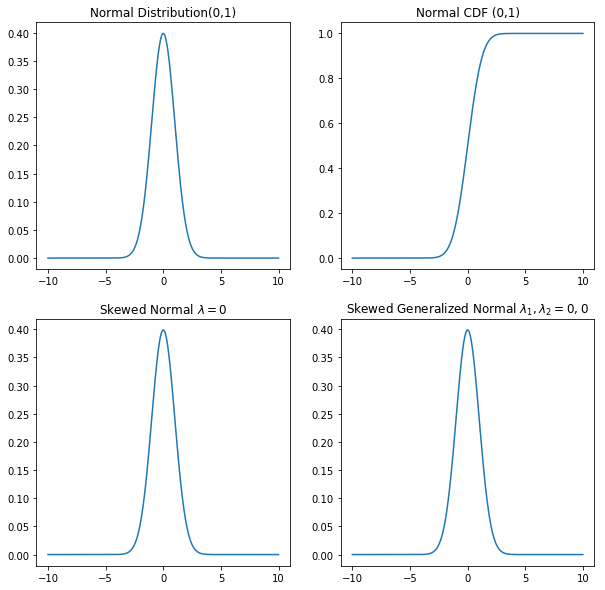

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
ax1.plot(x, y1)
ax1.set_title('Normal Distribution(0,1)')
#ax.set_xlabel('x-label')

ax2 = plt.subplot(222)
ax2.plot(x, y2)
ax2.set_title('Normal CDF (0,1)')

ax3 = plt.subplot(223)
ax3.plot(x, y3)
ax3.set_title('Skewed Normal $\lambda = 0$')

ax4 = plt.subplot(224)
ax4.plot(x, y4)
ax4.set_title('Skewed Generalized Normal $\lambda_1, \lambda_2 = 0, 0$')